<a href="https://colab.research.google.com/github/delrio-jaemee/CSST106-CS4B-DELRIO/blob/main/4B_DEL_RIO_EXER4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HOG Object Detection

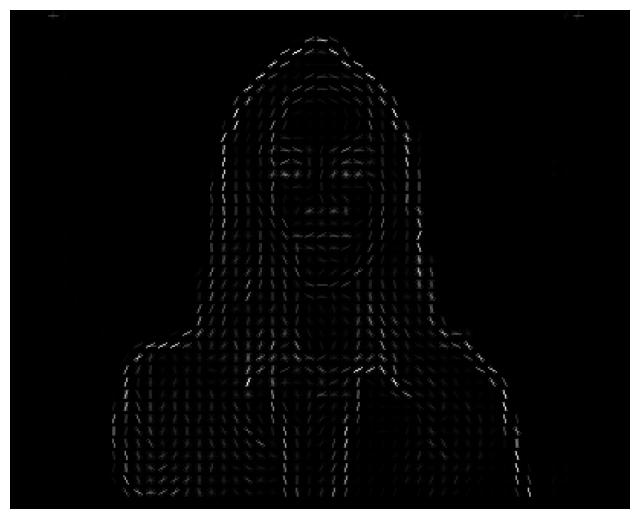

In [1]:
import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('/content/jae (1).jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply HOG descriptor
features, hog_image = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), visualize=True)

# Display the HOG image
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.imshow(hog_image, cmap='gray')
plt.show()

YOLO Object Detection

In [2]:
!wget https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true -O yolov3.cfg

--2024-11-10 04:48:01--  https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pjreddie/darknet/raw/refs/heads/master/cfg/yolov3.cfg [following]
--2024-11-10 04:48:02--  https://github.com/pjreddie/darknet/raw/refs/heads/master/cfg/yolov3.cfg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pjreddie/darknet/refs/heads/master/cfg/yolov3.cfg [following]
--2024-11-10 04:48:02--  https://raw.githubusercontent.com/pjreddie/darknet/refs/heads/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTT

In [10]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2024-11-10 05:07:24--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  32.3MB/s    in 7.3s    

2024-11-10 05:07:32 (32.4 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



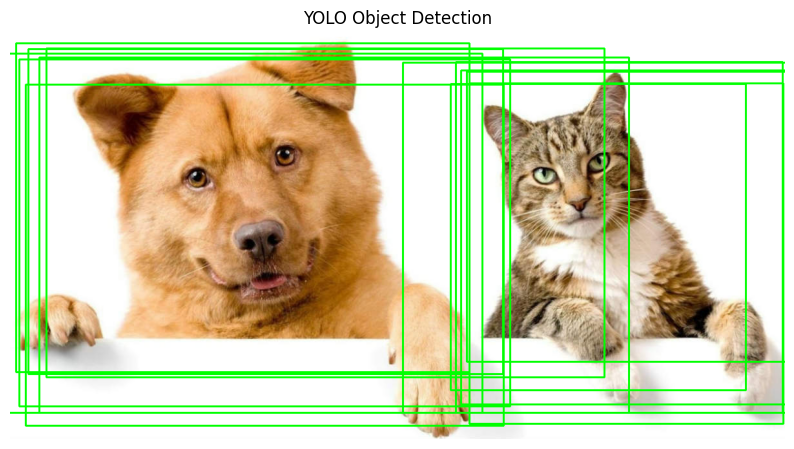

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load YOLO model and configuration
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
layer_names = net.getLayerNames()
# Since getUnconnectedOutLayers returns a 1D array in newer versions
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Load image
image = cv2.imread("/content/catdog.jpg")
height, width, channels = image.shape

# Prepare the image for YOLO
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# Process detections
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # draw bounding box
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Convert BGR image to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(image_rgb)
plt.title("YOLO Object Detection")
plt.show()

SSD (Single Shot MultiBox Detector)

In [13]:
# Download the TensorFlow Models repository
!wget -q https://github.com/tensorflow/models/archive/refs/heads/master.zip

# Unzip the downloaded repository
!unzip -q master.zip

# List the files to check the structure
!ls -l models-master/research/object_detection

total 732
drwxr-xr-x 2 root root  4096 Nov  8 19:34 anchor_generators
drwxr-xr-x 2 root root  4096 Nov  8 19:34 box_coders
drwxr-xr-x 2 root root  4096 Nov  8 19:34 builders
drwxr-xr-x 2 root root  4096 Nov  8 19:34 colab_tutorials
drwxr-xr-x 4 root root  4096 Nov  8 19:34 configs
-rw-r--r-- 1 root root   765 Nov  8 19:34 CONTRIBUTING.md
drwxr-xr-x 2 root root  4096 Nov  8 19:34 core
drwxr-xr-x 2 root root  4096 Nov  8 19:34 data
drwxr-xr-x 2 root root  4096 Nov  8 19:34 data_decoders
drwxr-xr-x 4 root root  4096 Nov  8 19:34 dataset_tools
drwxr-xr-x 6 root root  4096 Nov  8 19:34 dockerfiles
-rw-r--r-- 1 root root 55742 Nov  8 19:34 eval_util.py
-rw-r--r-- 1 root root 20372 Nov  8 19:34 eval_util_test.py
-rw-r--r-- 1 root root 16191 Nov  8 19:34 exporter_lib_tf2_test.py
-rw-r--r-- 1 root root 13886 Nov  8 19:34 exporter_lib_v2.py
-rw-r--r-- 1 root root  7577 Nov  8 19:34 exporter_main_v2.py
-rw-r--r-- 1 root root 27823 Nov  8 19:34 exporter.py
-rw-r--r-- 1 root root 58713 Nov  8 19:34

In [16]:
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the pre-trained model from TensorFlow Hub
model = hub.load('https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1')

# Load and prepare the image
image_path = '/content/catdog.jpg'
image_np = cv2.imread(image_path)
image_np = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
input_tensor = tf.convert_to_tensor(image_np)
input_tensor = input_tensor[tf.newaxis, ...]  # Add batch dimension

# Run the model and get the detections
# Call the appropriate method from the model
detections = model(input_tensor)

# The output format may include 'detection_boxes', 'detection_scores', and 'detection_classes'
# We can access these like so:
detection_boxes = detections['detection_boxes'][0].numpy()  # Get the first image in the batch
detection_scores = detections['detection_scores'][0].numpy()
detection_classes = detections['detection_classes'][0].numpy().astype(np.int64)  # Convert to integer

# Set a threshold for detection
threshold = 0.5

# Draw bounding boxes on the image
for i in range(len(detection_boxes)):
    if detection_scores[i] >= threshold:
        box = detection_boxes[i] * np.array([image_np.shape[0], image_np.shape[1], image_np.shape[0], image_np.shape[1]])
        (y_min, x_min, y_max, x_max) = box.astype(int)
        cv2.rectangle(image_np, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

# Display the result
plt.figure(figsize=(12, 8))
plt.imshow(image_np)
plt.axis('off')
plt.show()

NameError: name 'predict_fn' is not defined